# Modelo LSTM para predição

---


___

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math
import requests
import json
import os
import statsmodels.api as sm
import tensorflow as tf
from pandas import concat

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import math

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## 1. Importando os datasets

In [2]:
dataset_cluster_series = pd.read_csv("..//datasets//dataset_cluster1_series.csv", header=0, index_col=0)
dataset_cluster_validacao = pd.read_csv("..//datasets//dataset_cluster1_validation.csv", header=0, index_col=0)

dataset_cluster_series = dataset_cluster_series.append(dataset_cluster_validacao)


In [3]:
# dataset_cluster_series = dataset_cluster_series.drop('desembolso', axis=1)
# dataset_cluster_series = dataset_cluster_series.drop('preco_brent', axis=1)
# dataset_cluster_series = dataset_cluster_series.drop('tjlp', axis=1)
# dataset_cluster_series = dataset_cluster_series.drop('pib_mensal', axis=1)

dataset_cluster_series.head(20)

,indice_pimpf,ipca,taxa_selic,taxa_cambio,ibcbr,tjlp,pib_mensal,preco_brent,desembolso,debitos,arrecadacao
mes,,,,,,,,,,,
2004-01-01 00:00:00,104.0,0.76,16.32,136.19,98.59,10.00,1735331.5,31.18,1107.0,7472665.21,24292254.98
2004-02-01 00:00:00,103.1,0.61,16.30,139.84,99.45,10.00,1746819.2,30.87,2559.0,15992826.63,20243261.18
2004-03-01 00:00:00,113.0,0.47,16.19,138.89,111.98,10.00,1765492.2,33.80,4302.0,14035100.35,21503893.13
2004-04-01 00:00:00,107.8,0.37,15.96,138.85,107.36,9.75,1781058.0,33.36,5474.0,26344116.48,27743614.22
2004-05-01 00:00:00,108.9,0.51,15.77,148.25,106.03,9.75,1800951.1,37.92,5976.0,16300643.64,27665574.88
2004-06-01 00:00:00,113.1,0.71,15.80,149.04,107.00,9.75,1828299.9,35.19,7338.0,14513334.14,28449577.71
2004-07-01 00:00:00,110.9,0.91,15.77,143.11,111.47,9.75,1853700.2,38.37,8251.0,28615256.55,32201565.39
2004-08-01 00:00:00,113.2,0.69,15.86,140.62,110.65,9.75,1878059.7,43.03,8887.0,15948970.28,34787089.96
2004-09-01 00:00:00,107.6,0.33,16.09,135.23,109.21,9.75,1894202.4,43.38,9562.0,17532215.81,37284767.93


## 2. Preparando o dataset para a rede neural LSTM

In [4]:
np.random.seed(10)


In [5]:
serie_cluster = np.array(dataset_cluster_series)

In [6]:
print(serie_cluster)

[[1.04000000e+02 7.60000000e-01 1.63200000e+01 ... 1.10700000e+03
  7.47266521e+06 2.42922550e+07]
 [1.03100000e+02 6.10000000e-01 1.63000000e+01 ... 2.55900000e+03
  1.59928266e+07 2.02432612e+07]
 [1.13000000e+02 4.70000000e-01 1.61900000e+01 ... 4.30200000e+03
  1.40351003e+07 2.15038931e+07]
 ...
 [1.01200000e+02 8.60000000e-01 1.90000000e+00 ... 8.31900000e+03
  1.64616069e+09 1.16287568e+09]
 [1.04100000e+02 8.90000000e-01 1.90000000e+00 ... 9.33800000e+03
  2.48474111e+09 1.10391001e+09]
 [1.10200000e+02 1.35000000e+00 1.90000000e+00 ... 1.26730000e+04
  7.69744738e+08 1.08570158e+09]]


### 2.1 Convertendo o array em um modelo de dados 3D para entrada na rede LSTM 

---
Créditos: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

Para fazer a predição, utilizei os 12 primeiros meses para predizer o seguinte. Com isso, o dataset perde 12 meses, uma vez que os 11 primeiros meses não possuem 12 meses anteriores e o último mês não possui valor conhecido da arrecadação do mês subsequente.

___

In [7]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
 
raw = DataFrame()
raw['ob1'] = [x for x in range(10)]
raw['ob2'] = [x for x in range(50, 60)]
# values = raw.values
values = pd.DataFrame(serie_cluster).values
serie_cluster_prepared = series_to_supervised(values,12)
print(serie_cluster_prepared)

     var1(t-12)  var2(t-12)  var3(t-12)  var4(t-12)  var5(t-12)  var6(t-12)  \
12        104.0        0.76       16.32      136.19       98.59       10.00   
13        103.1        0.61       16.30      139.84       99.45       10.00   
14        113.0        0.47       16.19      138.89      111.98       10.00   
15        107.8        0.37       15.96      138.85      107.36        9.75   
16        108.9        0.51       15.77      148.25      106.03        9.75   
..          ...         ...         ...         ...         ...         ...   
199        97.9        0.11        5.90      114.23      141.78        5.95   
200       101.7       -0.04        5.71      117.25      138.26        5.95   
201       102.5        0.10        5.38      116.42      142.80        5.57   
202        99.4        0.51        4.90      117.74      138.83        5.57   
203       100.6        1.15        4.59      114.94      137.50        5.57   

     var7(t-12)  var8(t-12)  var9(t-12)   var10(t-1

### 2.3 Dividindo o dataset em sets de treino e teste

In [8]:
# Divide em conjuntos de treino e teste e predição
values = serie_cluster_prepared.values
# Base de treino com 144 meses
periodo_treino = 144
train = values[:periodo_treino, :]
test = values[periodo_treino:180, :]
predict = values[180:, :]


In [9]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
predict_X, predict_y = predict[:, :-1], predict[:, -1]

### Normalizando os datasets

In [10]:
## Normalizando os datasets


scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_predict_X = MinMaxScaler(feature_range=(0, 1))
scaler_predict_y = MinMaxScaler(feature_range=(0, 1))


train_X = scaler_X.fit_transform(train_X)
test_X = scaler_X.fit_transform(test_X)

train_y = scaler_y.fit_transform(train_y.reshape(-1,1))
test_y = scaler_y.fit_transform(test_y.reshape(-1,1))

predict_X = scaler_predict_X.fit_transform(predict_X)
predict_y = scaler_predict_y.fit_transform(predict_y.reshape(-1,1))

In [11]:
# Reformata o array 3D 
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
predict_X = predict_X.reshape((predict_X.shape[0], 1, predict_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape,predict_X.shape, predict_y.shape)

(144, 1, 142) (144, 1) (36, 1, 142) (36, 1) (12, 1, 142) (12, 1)


## 3. Implementando o modelo LSTM


In [12]:
#Função para calculo do MAPE - Mean Absolute Percentage Error, que será  utilizado como medida de erro do modelo

def calculo_mape(y_pred,y_true):

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:
train_X.shape

(144, 1, 142)

In [34]:


initializer = tf.keras.initializers.GlorotNormal(seed=11)

model = Sequential()

model.add(LSTM(20, kernel_initializer=initializer, 
               input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='Adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=64,
                    validation_data=(test_X, test_y),  verbose=1, shuffle=False)



Epoch 1/50
3/3 [==============================] - 1s 148ms/step - loss: 0.0562 - val_loss: 0.0633
Epoch 2/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0271 - val_loss: 0.0277
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0381 - val_loss: 0.0207
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0431 - val_loss: 0.0176
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0328 - val_loss: 0.0164
Epoch 6/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0174 - val_loss: 0.0216
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0081 - val_loss: 0.0319
Epoch 8/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0069 - val_loss: 0.0397
Epoch 9/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0084 - val_loss: 0.0394
Epoch 10/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0082 - val_loss: 0.0333
Epoch 11/50
3/3 [===========

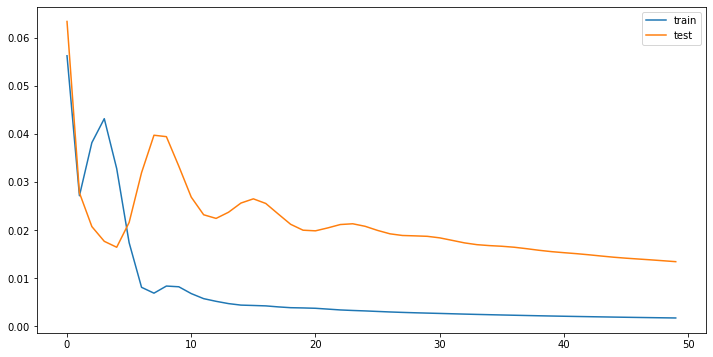

In [35]:
# plot history
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


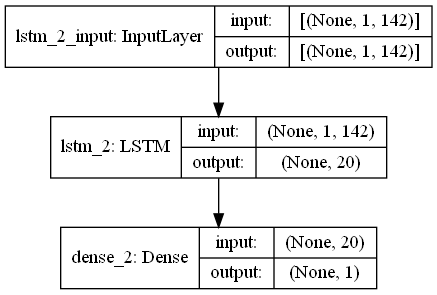

In [36]:

plot_model(model, show_shapes=True)

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                13040     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 13,061
Trainable params: 13,061
Non-trainable params: 0
_________________________________________________________________


# 4. Fazendo a validação para o período de 2017 a 2019

In [38]:
# Realizando a predição


yhat = model.predict(test_X)
test_X_final = test_X.reshape(test_X.shape[0], test_X.shape[2])

# invertendo a normalização para apresentar a previsão

yhat_reshaped = yhat.reshape(len(yhat),1)
inv_yhat = np.concatenate((yhat_reshaped, test_X_final[:, :-1]), axis=1)

inv_yhat = inv_yhat[:,0]

test_y_final = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y_final, test_X_final[:, 1:]), axis=1)

inv_y = inv_y[:,0]


# Calculando RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))


print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.116


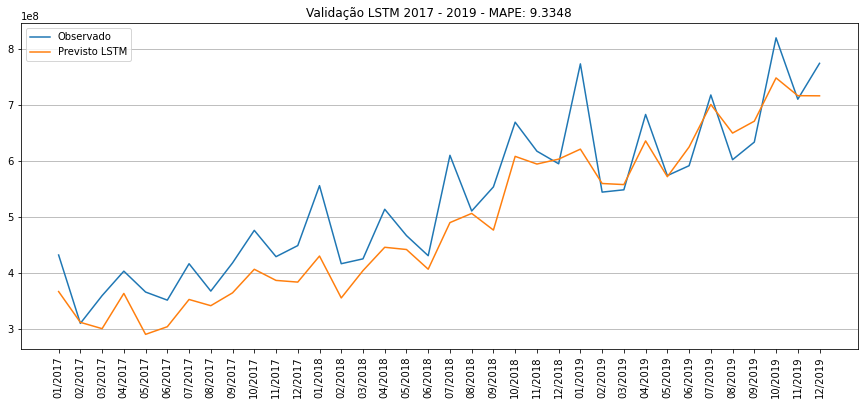

In [39]:
test_y_inv = scaler_y.inverse_transform(test_y_final)
yhat_final_inv = scaler_y.inverse_transform(yhat_reshaped)


df_data = pd.date_range('2017-01','2020-01', freq = 'm')

# Plota o valor observado vs previsto. 

plt.figure(figsize=(15,6))
plt.plot(test_y_inv, label='Observado')
plt.plot(yhat_final_inv, label='Previsto LSTM')
plt.legend()
plt.title('Validação LSTM 2017 - 2019 - MAPE: %.4f' % calculo_mape(yhat_final_inv, test_y_inv))
plt.xticks(np.arange(len(test_y_inv)),df_data.strftime('%m/%Y'), rotation='vertical')
plt.grid(True,axis='y')
plt.show()


In [40]:
## Formatação das tabelas

pd.set_option('max_columns', None)
pd.options.display.float_format = '{:,.2%}'.format

In [41]:
variacao_percentual = pd.DataFrame(((yhat_final_inv/test_y_inv)-1) ,columns=['variacao'])

In [42]:
set_alerta_negativo = pd.DataFrame()
set_normal= pd.DataFrame()
set_alerta_positivo = pd.DataFrame()

In [43]:
for i in range (len(variacao_percentual)):
    if variacao_percentual.iloc[i].values[0] > 0.05:
        set_alerta_negativo = set_alerta_negativo.append(variacao_percentual[i:i+1])
    elif variacao_percentual.iloc[i].values[0] < -0.05:
        set_alerta_positivo = set_alerta_positivo.append(variacao_percentual[i:i+1])
    else:
        set_normal = set_normal.append(variacao_percentual[i:i+1])
        

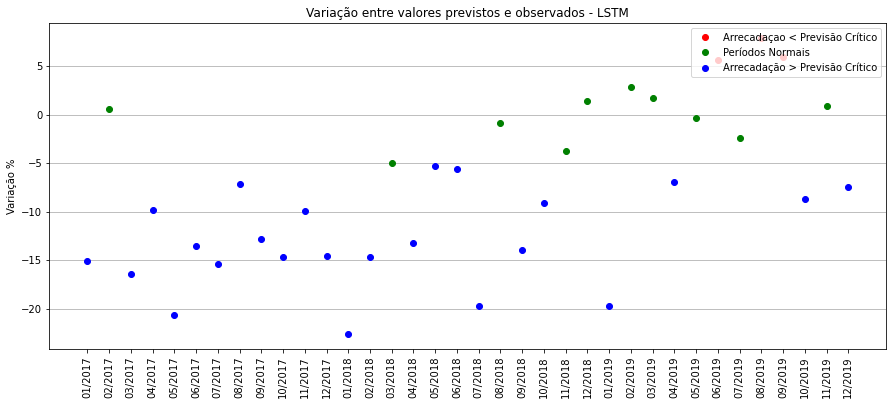

In [44]:
df_data = pd.date_range('2017-01','2020-01', freq = 'm')

#Plota o resultado do modelo
fig, ax = plt.subplots(figsize=(15,6))
ax.set_ylabel('Variação %')

plt.plot(variacao_percentual * 100, 'o', color='white')

if len(set_alerta_negativo) > 0:
    plt.plot(set_alerta_negativo * 100, 'o', color='red',  label='Arrecadaçao < Previsão Crítico')

if len(set_normal) > 0:
    plt.plot(set_normal * 100, 'o', color='green',  label='Períodos Normais')

if len(set_alerta_positivo) > 0:
    plt.plot(set_alerta_positivo * 100, 'o', color='blue',  label='Arrecadação > Previsão Crítico')

plt.title('Variação entre valores previstos e observados - LSTM' )
plt.grid(True,axis='y')
ax.set_xticks(range(len(df_data)))
plt.xticks(ax.get_xticks(), df_data.strftime('%m/%Y'), rotation='vertical')
plt.legend(loc='upper right')

# 5. Predição para 2020

In [45]:
# Realizando a predição


yhat = model.predict(predict_X)
predict_X_final = predict_X.reshape(predict_X.shape[0], predict_X.shape[2])

# Invertendo a escala para apresentar a previsão

yhat_reshaped = yhat.reshape(len(yhat),1)
inv_yhat = np.concatenate((yhat_reshaped, predict_X_final[:, :-1]), axis=1)

inv_yhat = inv_yhat[:,0]
predict_y_final = predict_y.reshape((len(predict_y), 1))
inv_y = np.concatenate((predict_y_final, predict_X_final[:, 1:]), axis=1)

inv_y = inv_y[:,0]

# Calculando o RMSE e o MAPE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))

# mape = calculo_mape(inv_yhat, inv_y)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.290


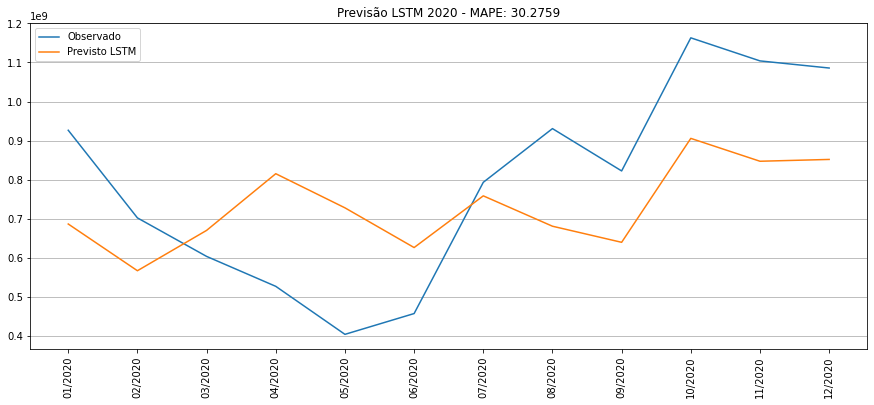

In [46]:
predict_y_inv = scaler_predict_y.inverse_transform(predict_y_final)
yhat_final_inv = scaler_predict_y.inverse_transform(yhat_reshaped)


df_data = pd.date_range('2020-01','2021-01', freq = 'm')

# Plota o valor observado vs previsto. 

plt.figure(figsize=(15,6))
plt.plot(predict_y_inv, label='Observado')
plt.plot(yhat_final_inv, label='Previsto LSTM')
plt.legend()
plt.title('Previsão LSTM 2020 - MAPE: %.4f' % calculo_mape(yhat_final_inv[0], predict_y_inv))
plt.xticks(np.arange(len(predict_y_inv)),df_data.strftime('%m/%Y'), rotation='vertical')
plt.grid(True,axis='y')
plt.show()

In [47]:
## Formatação das tabelas

pd.set_option('max_columns', None)
pd.options.display.float_format = '{:,.2%}'.format

In [48]:
variacao_percentual = pd.DataFrame(((yhat_final_inv/predict_y_inv)-1) ,columns=['variacao'])

In [49]:
set_alerta_negativo = pd.DataFrame()
set_normal= pd.DataFrame()
set_alerta_positivo = pd.DataFrame()

In [50]:
for i in range (len(variacao_percentual)):
    if variacao_percentual.iloc[i].values[0] > 0.05:
        set_alerta_negativo = set_alerta_negativo.append(variacao_percentual[i:i+1])
    elif variacao_percentual.iloc[i].values[0] < -0.05:
        set_alerta_positivo = set_alerta_positivo.append(variacao_percentual[i:i+1])
    else:
        set_normal = set_normal.append(variacao_percentual[i:i+1])
        

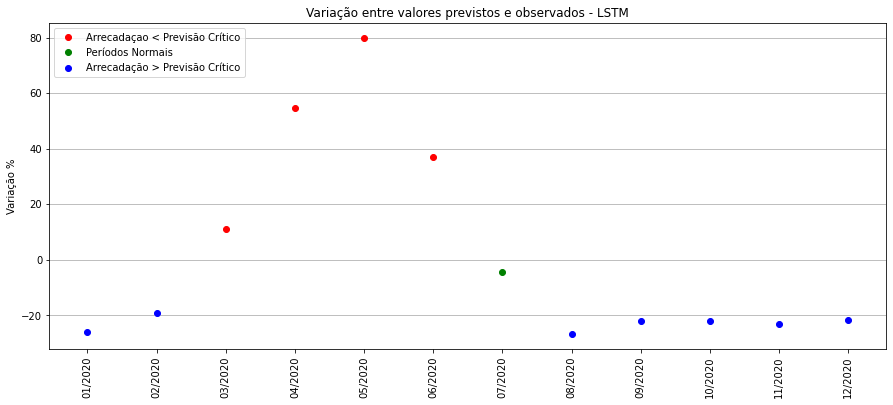

In [51]:
df_data = pd.date_range('2020-01','2021-01', freq = 'm')

#Plota o resultado do modelo
fig, ax = plt.subplots(figsize=(15,6))
ax.set_ylabel('Variação %')

plt.plot(variacao_percentual * 100, 'o', color='white')

if len(set_alerta_negativo) > 0:
    plt.plot(set_alerta_negativo * 100, 'o', color='red',  label='Arrecadaçao < Previsão Crítico')

if len(set_normal) > 0:
    plt.plot(set_normal * 100, 'o', color='green',  label='Períodos Normais')

if len(set_alerta_positivo) > 0:
    plt.plot(set_alerta_positivo * 100, 'o', color='blue',  label='Arrecadação > Previsão Crítico')

plt.title('Variação entre valores previstos e observados - LSTM' )
plt.grid(True,axis='y')
ax.set_xticks(range(0,12))
plt.xticks(ax.get_xticks(), df_data.strftime('%m/%Y'), rotation='vertical')
plt.legend(loc='upper left')